In [1]:
#Necessary Imports
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format #Turning off scientific notations

In [15]:
#Data Ingestion
os.chdir("E:/Springboard/Github/Springboard_Projects")
df=pd.read_csv("E:\\Springboard\\Capstone 2\\data sets\\zomato_restaurants_in_india.csv")
print(df.shape)
df.head()

(211944, 26)


,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.21,78.00,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.40,Very Good,814,154,0.00,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.16,78.01,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.40,Very Good,1203,161,0.00,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.18,77.98,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.20,Very Good,801,107,0.00,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.21,78.00,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.30,Very Good,693,157,0.00,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.16,78.05,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.90,Excellent,470,291,0.00,1,-1


In [25]:
df.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

In [26]:
df.isnull().sum() #looks like zip code column should be dropped

res_id                       0
name                         0
establishment                0
url                          0
address                    134
city                         0
city_id                      0
locality                     0
latitude                     0
longitude                    0
zipcode                 163187
country_id                   0
locality_verbose             0
cuisines                  1391
timings                   3874
average_cost_for_two         0
price_range                  0
currency                     0
highlights                   0
aggregate_rating             0
rating_text                  0
votes                        0
photo_count                  0
opentable_support           48
delivery                     0
takeaway                     0
dtype: int64

In [27]:
df['zipcode']=df['zipcode'].astype('object')

In [28]:
df['zipcode'].value_counts(dropna=False).head(20) #163187 Missing Values + 9857 values are 0 which is not possible. 
# I can use city, locality, longitude and latitude instead of zipcode, so I am dropping zipcode

NaN       163187
0           9857
482001       918
313001       750
305001       578
226010       539
248001       491
605001       459
603203       444
482002       443
800001       382
143001       378
305022       321
600024       316
395007       306
144001       303
600017       274
600028       268
403001       259
492001       253
Name: zipcode, dtype: int64

In [29]:
df=df.drop('zipcode', axis=1)

In [3]:
#Other columns to be dropped:
#res_id (identifier column, not much use of it)
#url (website not required for analysis, even if i encode it, all values will be 1)
#country_id (all restaurants are in india only, so no use for this column)
#Let's drop these and check the data further.
#Not dropping name right now, as I want to see if any big restaurant brands are better rated than others or not.

In [4]:
df=df.drop(['res_id','url','country_id'],axis=1)

In [5]:
df.dtypes

name                     object
establishment            object
address                  object
city                     object
city_id                   int64
locality                 object
latitude                float64
longitude               float64
zipcode                  object
locality_verbose         object
cuisines                 object
timings                  object
average_cost_for_two      int64
price_range               int64
currency                 object
highlights               object
aggregate_rating        float64
rating_text              object
votes                     int64
photo_count               int64
opentable_support       float64
delivery                  int64
takeaway                  int64
dtype: object

In [6]:
#delivery and takeaway columns are categorical and are stored as int, so this needs to be fixed.
df['delivery']=df['delivery'].astype(object)
df['takeaway']=df['takeaway'].astype(object)

In [7]:
df['delivery'].value_counts() #Why -1?

-1    132573
 1     78335
 0      1036
Name: delivery, dtype: int64

In [8]:
df['takeaway'].value_counts()  #Why -1?

-1    211944
Name: takeaway, dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
city_id,211944.00,4746.79,5568.77,1.00,11.00,34.00,11306.00,11354.00
latitude,211944.00,21.50,22.78,0.00,15.50,22.51,26.84,10000.00
longitude,211944.00,77.62,7.50,0.00,74.88,77.43,80.22,91.83
average_cost_for_two,211944.00,595.81,606.24,0.00,250.00,400.00,700.00,30000.00
price_range,211944.00,1.88,0.89,1.00,1.00,2.00,2.00,4.00
aggregate_rating,211944.00,3.40,1.28,0.00,3.30,3.80,4.10,4.90
votes,211944.00,378.00,925.33,-18.00,16.00,100.00,362.00,42539.00
photo_count,211944.00,256.97,867.67,0.00,3.00,18.00,128.00,17702.00
opentable_support,211896.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [35]:
#opentable_support has all 0 values and has 48 missing values----> Not much use, so dropping it.
#res_id is the identifier, so to be dropped.
#latitude has a max value of 10000 which is not possible. (range of latitude is -90 to +90)
#Longitude max is 91.83, longitude range is -90 to +90. 
#country_id can be dropped as restaurant data is of india only.
#average_cost_for_two=30000???? and minimum 0?? why would a restaurant sell for free?? check?
#-18 min value for votes, check.. does -1 mean downvote?
#price_range is in the range 1 to 4.9, check?

In [10]:
df=df.drop('opentable_support', axis=1)

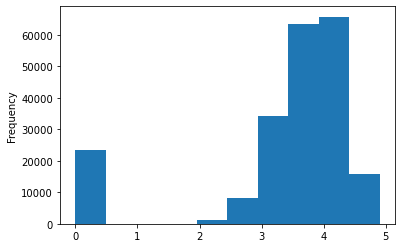

In [16]:
df['aggregate_rating'].plot(kind='hist') 
#Seems normal distribution like, but why is rating 0? Maybe its unrated and submitted.
#1 rating is blank, check!

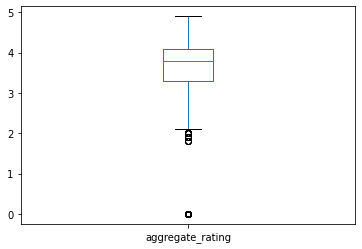

In [17]:
df['aggregate_rating'].plot(kind='box') #Looks like 0 means unrated

In [38]:
df[df['aggregate_rating']==1] 
#No restaurant with rating 1

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway


In [39]:
df[df['aggregate_rating']==2] 
#22 restaurants with rating 2

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
20031,50433,Fusion Lounge,['Lounge'],https://www.zomato.com/bangalore/fusion-lounge...,"185, Dena Complex, 2nd Floor, Brigade Road, Ba...",Bangalore,4,Brigade Road,12.97,77.61,...,3,Rs.,"['Lunch', 'Debit Card', 'Credit Card', 'Cash',...",2.00,Poor,410,18,0.00,-1,-1
20032,51192,Bhagini,['Casual Dining'],https://www.zomato.com/bangalore/bhagini-marat...,"39/1, Outer Ring Road, Near Fem City, Doddanek...",Bangalore,4,Marathahalli,12.98,77.70,...,2,Rs.,"['Credit Card', 'Delivery', 'Lunch', 'No Alcoh...",2.00,Poor,263,81,0.00,-1,-1
20766,50433,Fusion Lounge,['Lounge'],https://www.zomato.com/bangalore/fusion-lounge...,"185, Dena Complex, 2nd Floor, Brigade Road, Ba...",Bangalore,4,Brigade Road,12.97,77.61,...,3,Rs.,"['Lunch', 'Debit Card', 'Credit Card', 'Cash',...",2.00,Poor,410,18,0.00,-1,-1
55348,3237,Club Ice Cube,['Club'],https://www.zomato.com/ncr/club-ice-cube-secto...,"313, 3rd Floor, The Great India Place Mall, Se...",Noida,1,"The Great India Place, Sector 38",28.57,77.33,...,4,Rs.,"['Dinner', 'Lunch', 'Takeaway Available', 'Mal...",2.00,Poor,278,22,0.00,-1,-1
58230,3957,Madras Coffee House,['Casual Dining'],https://www.zomato.com/ncr/madras-coffee-house...,"P-5/90, Outer Circle, Connaught Place, New Delhi",New Delhi,1,Connaught Place,28.63,77.22,...,2,Rs.,"['Cash', 'No Alcohol Available', 'Lunch', 'Tak...",2.00,Poor,302,175,0.00,-1,-1
58231,3237,Club Ice Cube,['Club'],https://www.zomato.com/ncr/club-ice-cube-secto...,"313, 3rd Floor, The Great India Place Mall, Se...",Noida,1,"The Great India Place, Sector 38",28.57,77.33,...,4,Rs.,"['Dinner', 'Lunch', 'Takeaway Available', 'Mal...",2.00,Poor,278,22,0.00,-1,-1
58232,3585,Suburbia - The Empire,['Lounge'],https://www.zomato.com/ncr/suburbia-the-empire...,"2nd Floor, MGF Metropolitan Mall, MG Road, Gur...",Gurgaon,1,"MGF Metropolitan Mall, MG Road",28.48,77.08,...,3,Rs.,"['Lunch', 'Debit Card', 'Credit Card', 'Cash',...",2.00,Poor,95,23,0.00,-1,-1
58870,3957,Madras Coffee House,['Casual Dining'],https://www.zomato.com/ncr/madras-coffee-house...,"P-5/90, Outer Circle, Connaught Place, New Delhi",New Delhi,1,Connaught Place,28.63,77.22,...,2,Rs.,"['Cash', 'No Alcohol Available', 'Lunch', 'Tak...",2.00,Poor,302,175,0.00,-1,-1
58871,3237,Club Ice Cube,['Club'],https://www.zomato.com/ncr/club-ice-cube-secto...,"313, 3rd Floor, The Great India Place Mall, Se...",Noida,1,"The Great India Place, Sector 38",28.57,77.33,...,4,Rs.,"['Dinner', 'Lunch', 'Takeaway Available', 'Mal...",2.00,Poor,278,22,0.00,-1,-1
58872,3585,Suburbia - The Empire,['Lounge'],https://www.zomato.com/ncr/suburbia-the-empire...,"2nd Floor, MGF Metropolitan Mall, MG Road, Gur...",Gurgaon,1,"MGF Metropolitan Mall, MG Road",28.48,77.08,...,3,Rs.,"['Lunch', 'Debit Card', 'Credit Card', 'Cash',...",2.00,Poor,95,23,0.00,-1,-1


In [40]:
df['city'].value_counts(dropna=False).head(30) 
#Chennai has the most number of restaurants listed on Zomato (Interestingly its almost 2x of 2nd, i.e. Mumbai!)
# 2nd is Mumbai(almost half of Chennai), then Banglore, Pune, Lucknow, Jabalpur, New Delhi.
# Area of Chennai is 426sq. km, and that of mumbai is 603.4 sq. km (googled it). 
#So either Chennai has more restaurants than Mumbai, or Chennai restaurants prefer zomato more.
#Zomato HQ is in Gurgaon, but Gurgaon not even in top 30.

Chennai         11630
Mumbai           6497
Bangalore        4971
Pune             4217
Lucknow          4121
Jabalpur         3994
New Delhi        3918
Jaipur           3713
Kochi            3370
Ajmer            3277
Ahmedabad        3162
Goa              2992
Nagpur           2992
Indore           2958
Coimbatore       2824
Surat            2713
Vadodara         2678
Bhopal           2656
Agra             2622
Guwahati         2622
Ludhiana         2618
Udaipur          2600
Dehradun         2577
Raipur           2568
Bhubaneshwar     2555
Patna            2547
Kanpur           2542
Jammu            2451
Jodhpur          2445
Puducherry       2424
Name: city, dtype: int64

In [41]:
delhi=df[df['city']=='New Delhi'] #Just curious to see what the data in my hometown looks like! :-P
delhi.head(20)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
53884,18895645,Plum By Bent Chair,['Casual Dining'],https://www.zomato.com/ncr/plum-by-bent-chair-...,"The Walk, Worldmark 2, Aerocity, New Delhi",New Delhi,1,Aerocity,28.55,77.12,...,1,Rs.,"['Debit Card', 'Dinner', 'Cash', 'Credit Card'...",4.90,Excellent,1545,4321,0.00,-1,-1
53885,18429148,Pa Pa Ya,['Fine Dining'],https://www.zomato.com/ncr/pa-pa-ya-saket-new-...,"Dome, Level 4, Select Citywalk, A-3, District ...",New Delhi,1,"Select Citywalk Mall, Saket",28.53,77.22,...,4,Rs.,"['Credit Card', 'Debit Card', 'Lunch', 'Serves...",4.70,Excellent,3234,8344,0.00,-1,-1
53886,18418277,Ministry Of Beer,['Lounge'],https://www.zomato.com/ncr/ministry-of-beer-co...,"M 44, Outer Circle, Connaught Place, New Delhi",New Delhi,1,Connaught Place,28.63,77.22,...,3,Rs.,"['Lunch', 'Credit Card', 'Dinner', 'Cash', 'De...",4.50,Excellent,3043,9984,0.00,-1,-1
53887,18625812,Detroit,['Bar'],https://www.zomato.com/ncr/detroit-connaught-p...,"F40, 2nd Floor, Inner Circle, \nConnaught Plac...",New Delhi,1,Connaught Place,28.63,77.22,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Takeaway Availabl...",4.60,Excellent,1327,3255,0.00,-1,-1
53888,18423151,The Darzi Bar & Kitchen,['Casual Dining'],https://www.zomato.com/TheDarziBar?utm_source=...,"H 55, 1st Floor, Outer Circle, Connaught Place...",New Delhi,1,Connaught Place,28.64,77.22,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.30,Very Good,3211,9618,0.00,-1,-1
53890,18238278,Tamasha,['Bar'],https://www.zomato.com/ncr/tamasha-connaught-p...,"28, Block A, Kasturba Gandhi Marg, Connaught P...",New Delhi,1,Connaught Place,28.63,77.22,...,3,Rs.,"['Credit Card', 'Serves Alcohol', 'Debit Card'...",4.50,Excellent,8702,6126,0.00,-1,-1
53891,308322,Hauz Khas Social,['Lounge'],https://www.zomato.com/HauzKhasSocial?utm_sour...,"9-A & 12, Hauz Khas Village, New Delhi",New Delhi,1,Hauz Khas Village,28.55,77.19,...,3,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Breakfa...",4.80,Excellent,14751,11914,0.00,1,-1
53892,18382360,Local,['Bar'],https://www.zomato.com/ncr/local-connaught-pla...,"11, KG Marg, Scindia House, Connaught Place, N...",New Delhi,1,Connaught Place,28.63,77.22,...,3,Rs.,"['Credit Card', 'Dinner', 'Cash', 'Debit Card'...",4.30,Very Good,6583,7496,0.00,-1,-1
53893,307374,AMA Cafe,['Café'],https://www.zomato.com/ncr/ama-cafe-majnu-ka-t...,"House 6, New Colony, Majnu ka Tila, New Delhi",New Delhi,1,Majnu ka Tila,28.70,77.23,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Brea...",4.50,Excellent,3749,8956,0.00,-1,-1
53894,18810973,Delhi Darbar Biryani Point,['Quick Bites'],https://www.zomato.com/ncr/delhi-darbar-biryan...,"B-234, Gate 4, East Metro Station, Uttam Nagar...",New Delhi,1,Uttam Nagar,28.63,77.06,...,1,Rs.,"['Dinner', 'Delivery', 'Lunch', 'Cash', 'Takea...",4.20,Very Good,1009,67,0.00,1,-1


In [42]:
delhi_locality=delhi['locality'].value_counts(dropna=False)
delhi_locality.head(40)
#Connaught place has the most number of listings, almost 2.5x of number 2 Rajouri Garden!

Connaught Place                            395
Rajouri Garden                             141
Punjabi Bagh                               109
Rohini                                      81
Khan Market                                 77
Delhi University-GTB Nagar                  73
Greater Kailash 1 (GK1)                     65
Malviya Nagar                               61
Select Citywalk Mall, Saket                 61
Greater Kailash 2 (GK2)                     59
Chandni Chowk                               52
Kamla Nagar                                 49
Chanakyapuri                                47
Epicuria Food Mall, Nehru Place             47
Vijay Nagar                                 47
Ambience Mall, Vasant Kunj                  46
Hauz Khas Village                           46
Pitampura                                   45
Mehrauli                                    42
Paschim Vihar                               40
Shahdara                                    38
Hauz Khas    

In [43]:
chennai=df[df['city']=='Chennai'] #The king territory of Zomato!
chennai.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
33460,18800810,The Black Pearl,['Casual Dining'],https://www.zomato.com/chennai/the-black-pearl...,"Plot 155, 292/132, Ground Floor, Rajiv Gandhi ...",Chennai,7,Sholinganallur,12.90,80.23,...,3,Rs.,"['Dinner', 'Cash', 'Credit Card', 'Debit Card'...",4.80,Excellent,2486,592,0.00,-1,-1
33461,18588039,Fromage,['Café'],https://www.zomato.com/chennai/fromage-mrc-nag...,"Somerset Greenway, Lords Avenue, MRC Nagar, Ch...",Chennai,7,MRC Nagar,13.02,80.27,...,3,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",4.50,Excellent,1053,1952,0.00,1,-1
33462,18595414,Coal Barbecues,['Casual Dining'],https://www.zomato.com/chennai/coal-barbecues-...,"40, 2nd Floor, Bazullah Road, T. Nagar, Chennai",Chennai,7,T. Nagar,13.05,80.24,...,3,Rs.,"['Dinner', 'Cash', 'Credit Card', 'Debit Card'...",4.90,Excellent,7110,2300,0.00,-1,-1
33463,72604,Coal Barbecues,['Casual Dining'],https://www.zomato.com/chennai/coal-barbecues-...,"Shop 17-18, Rajalakshmi Nagar, 7th Cross Stree...",Chennai,7,Velachery,12.99,80.22,...,3,Rs.,"['Cash', 'Credit Card', 'Debit Card', 'Deliver...",4.90,Excellent,7642,3479,0.00,-1,-1
33464,18720717,The Bark,['Café'],https://www.zomato.com/chennai/the-bark-1-alwa...,"40, Maharaja Surya Rao Road, Dutch Village, Al...",Chennai,7,Alwarpet,13.04,80.25,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",4.40,Very Good,510,902,0.00,1,-1


In [44]:
chennai['locality'].value_counts(dropna=False).head(20)

T. Nagar                            1138
Potheri                             1041
Nungambakkam                         815
Kodambakkam                          650
Anna Nagar East                      613
RA Puram                             366
Velachery                            282
Adyar                                256
Alwarpet                             243
Ashok Nagar                          234
Phoenix Market City, Velachery       221
Navallur                             218
Perungudi                            205
Besant Nagar                         197
Express Avenue Mall,  Royapettah     193
GST Road                             178
Anna Nagar West                      174
Mylapore                             167
Palavakkam                           164
Hotel Park Elanza, Nungambakkam      160
Name: locality, dtype: int64

In [ ]:
# Will it be a good idea to have the index as 'city'?